# Market Basket Analysis

## contents
### 1. Problem formulation and expected result
### 2. Preparation
#### 2.1. Load packages and settings
#### 2.2. Load data
### 3. Data cleaning & Data inspection
#### 3.1. Basic data inspect
#### 3.2. Data cleaning
#### 3.3. check out the null values and fix them
#### 3.4. inspect the distribution & situation through the time
### 4. Data processing
### 5. Run the model
### 6. Results

## 1. Problem formulation and expected result
### based on the online retail data: http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx
### a. what are the best product combinations in Germany?

## 2. Preparation
### 2.1.  Load packages and settings

In [1]:
#load packages
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
#set the plot size
sns.set(rc = {'figure.figsize':(12,10)})

In [3]:
#see all columns
pd.set_option('display.max_columns', None)

In [4]:
#change scientific numbers to float
np.set_printoptions(formatter = {'float_kind':'{:f}'.format})

In [5]:
# remove warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### 2.1. Load data

In [7]:
raw_data = pd.read_excel('/Users/juli/Desktop/ML/Online Retail.xlsx')

## 3. Data inspection
### 3.1. Basic data inspect

In [8]:
#check the first 5 rows
raw_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
#check the amount of rows and columns
raw_data.shape

(541909, 8)

In [10]:
# check the unique values in each column
for col in raw_data:
    print(col)
    print(raw_data[col].unique())
    print(len(raw_data[col].unique()))
    print('\n')

InvoiceNo
[536365 536366 536367 ... 581585 581586 581587]
25900


StockCode
['85123A' 71053 '84406B' ... '90214U' '47591b' 23843]
4070


Description
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
4224


Quantity
[     6      8      2     32      3      4     24     12     48     18
     20     36     80     64     10    120     96     23      5      1
     -1     50     40    100    192    432    144    288    -12    -24
     16      9    128     25     30     28      7     56     72    200
    600    480     -6     14     -2     11     33     13     -4     -5
     -7     -3     70    252     60    216    384    -10     27     15
     22     19     17     21     34     47    108     52  -9360    -38
     75    270     42    240     90    320   1824    204     69    -36
   -192   -144    160   2880   1400     39    -48    -50     26   1440
     31     82     78 

### 3.2. Data cleaning

In [32]:
# keep only Germany data
raw_data_de = raw_data[raw_data["Country"] == "Germany"]

In [33]:
# remove spaces
raw_data_de["Description"] = raw_data_de["Description"].str.strip()

/var/folders/y6/bjkjgw9x31dc7v_jspxtz9sw0000gn/T/ipykernel_1104/2713384744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data_de["Description"] = raw_data_de["Description"].str.strip()


In [34]:
# converting invoice numbers to strings
raw_data_de["InvoiceNo"] = raw_data_de["InvoiceNo"].astype("str")

/var/folders/y6/bjkjgw9x31dc7v_jspxtz9sw0000gn/T/ipykernel_1104/3791349940.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data_de["InvoiceNo"] = raw_data_de["InvoiceNo"].astype("str")


In [35]:
# remove credit transactions
raw_data_de = raw_data_de[~raw_data_de["InvoiceNo"].str.contains("C")]

In [55]:
#remove postage as a product
raw_data_de = raw_data_de[raw_data_de["Description"]!= "POSTAGE"]


### 3.3. Check null values and fix them

In [56]:
#check null values
raw_data_de.isnull().sum()
# there is no null values

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [57]:
raw_data_de.shape

(8668, 8)

### 3.4. inspect the distribution 

Text(0.5, 1.0, 'Top 10 Products - DE')

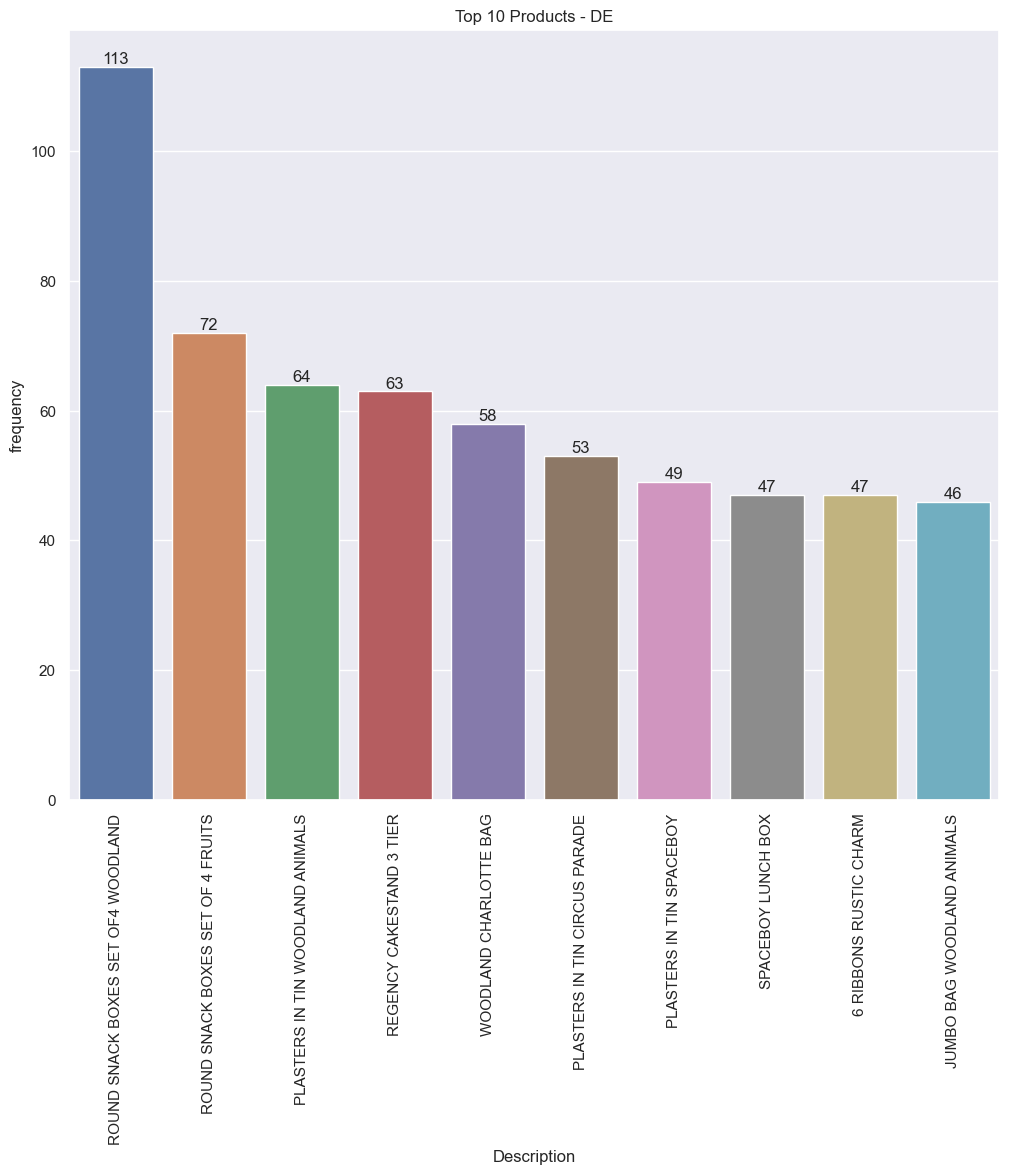

In [58]:
# inspect item distribution
item_dis = raw_data_de.groupby(by = "Description").size().reset_index(name="frequency").sort_values(by = "frequency", ascending = False).head(10)

ax = sns.barplot(x="Description", y="frequency", data=item_dis)
ax.bar_label(ax.containers[0])
ax.tick_params(axis='x', rotation=90)
plt.title("Top 10 Products - DE")

<AxesSubplot:title={'center':'Sold amount per month'}, xlabel='InvoiceDate'>

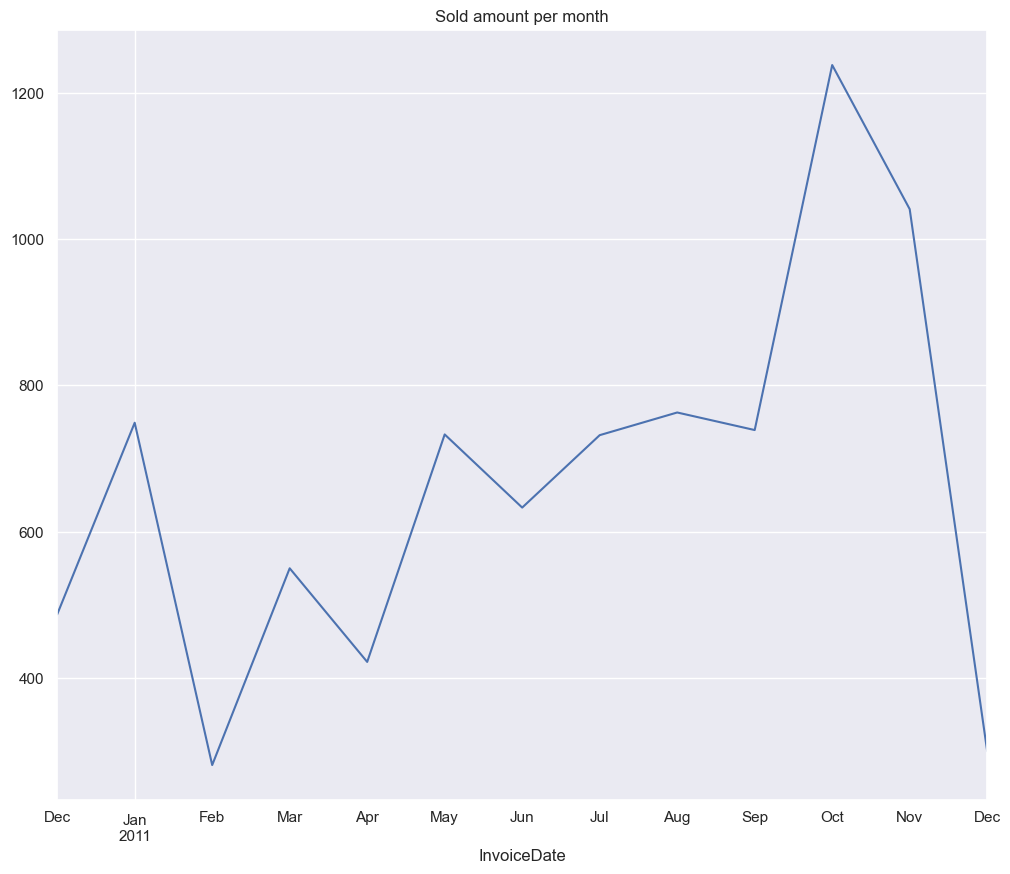

In [59]:
# inspect the sold amount through the time
date = raw_data_de.set_index(["InvoiceDate"])
date.resample("M")["Description"].count().plot(title = "Sold amount per month")

## 4. Data processing

In [60]:
# prepare the data for the model
# unstack
basket = raw_data_de.groupby(["InvoiceNo", "Description"])["Quantity"].sum().unstack().reset_index().fillna(0).set_index("InvoiceNo")

# converting positive values to 1 and everything else to 0
def encode_units(x):
    if x <= 0: 
        return 0
    if x >= 1:
        return 1

basket = basket.applymap(encode_units)

In [61]:
basket.head()

Description  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
InvoiceNo                                                         
536527                            0                           0   
536840                            0                           0   
536861                            0                           0   
536967                            0                           0   
536983                            0                           0   

Description  12 IVORY ROSE PEG PLACE SETTINGS  \
InvoiceNo                                       
536527                                      0   
536840                                      0   
536861                                      0   
536967                                      0   
536983                                      0   

Description  12 MESSAGE CARDS WITH ENVELOPES  12 PENCIL SMALL TUBE WOODLAND  \
InvoiceNo                                                                     
536527                                     0                              0   
536840                                     0                              0   
536861                                     0                              0   
536967                                     0                              0   
536983                                     0                              0   

Description  12 PENCILS SMALL TUBE RED RETROSPOT  12 PENCILS SMALL TUBE SKULL  \
InvoiceNo                                                                       
536527                                         0                            0   
536840                                         0                            0   
536861                                         0                            0   
536967                                         0                            0   
536983                                         0                            0   

Description  12 PENCILS TALL TUBE POSY  12 PENCILS TALL TUBE RED RETROSPOT  \
InvoiceNo                                                                    
536527                               0                                   0   
536840                               0                                   0   
536861                               0                                   0   
536967                               0                                   0   
536983                               0                                   0   

Description  12 PENCILS TALL TUBE SKULLS  12 PENCILS TALL TUBE WOODLAND  \
InvoiceNo                                                                 
536527                                 0                              0   
536840                                 0                              0   
536861                                 0                              0   
536967                                 0                              0   
536983                                 0                              0   

Description  12 PINK HEN+CHICKS IN BASKET  12 RED ROSE PEG PLACE SETTINGS  \
InvoiceNo                                                                   
536527                                  0                               0   
536840                                  0                               0   
536861                                  0                               0   
536967                                  0                               0   
536983                                  0                               0   

Description  16 PIECE CUTLERY SET PANTRY DESIGN  \
InvoiceNo                                         
536527                                        0   
536840                                        0   
536861                                        0   
536967                                        0   
536983                                        0   

Description  2 PICTURE BOOK EGGS EASTER BUNNY  \
InvoiceNo                                   

## 5. Run the model

In [62]:
# frequent itemsets
frequent_itemsets = apriori(basket, min_support = 0.07, use_colnames = True)
frequent_itemsets

/Users/juli/opt/anaconda3/envs/mlenv/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.104677,(6 RIBBONS RUSTIC CHARM)
1,0.071269,(ALARM CLOCK BAKELIKE PINK)
2,0.073497,(GUMBALL COAT RACK)
3,0.093541,(JAM MAKING SET PRINTED)
4,0.080178,(JUMBO BAG RED RETROSPOT)
5,0.102450,(JUMBO BAG WOODLAND ANIMALS)
6,0.080178,(LUNCH BAG WOODLAND)
7,0.086860,(PACK OF 72 RETROSPOT CAKE CASES)
8,0.118040,(PLASTERS IN TIN CIRCUS PARADE)
9,0.109131,(PLASTERS IN TIN SPACEBOY)


In [63]:
# rules
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)

## 6. Results

In [64]:
# top 100 combinations
rules.head(100)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PLASTERS IN TIN WOODLAND ANIMALS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.140312,0.249443,0.075724,0.539683,2.163549,0.040724,1.630520
1,(ROUND SNACK BOXES SET OF4 WOODLAND),(PLASTERS IN TIN WOODLAND ANIMALS),0.249443,0.140312,0.075724,0.303571,2.163549,0.040724,1.234424
2,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.249443,0.160356,0.133630,0.535714,3.340774,0.093630,1.808463
3,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.160356,0.249443,0.133630,0.833333,3.340774,0.093630,4.503341
4,(ROUND SNACK BOXES SET OF4 WOODLAND),(SPACEBOY LUNCH BOX),0.249443,0.104677,0.071269,0.285714,2.729483,0.045159,1.253452
5,(SPACEBOY LUNCH BOX),(ROUND SNACK BOXES SET OF4 WOODLAND),0.104677,0.249443,0.071269,0.680851,2.729483,0.045159,2.351745


In [66]:
# show the best combinations
rules[(rules["lift"] >= 2) & (rules["confidence"] >= 0.3)]



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PLASTERS IN TIN WOODLAND ANIMALS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.140312,0.249443,0.075724,0.539683,2.163549,0.040724,1.630520
1,(ROUND SNACK BOXES SET OF4 WOODLAND),(PLASTERS IN TIN WOODLAND ANIMALS),0.249443,0.140312,0.075724,0.303571,2.163549,0.040724,1.234424
2,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.249443,0.160356,0.133630,0.535714,3.340774,0.093630,1.808463
3,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.160356,0.249443,0.133630,0.833333,3.340774,0.093630,4.503341
5,(SPACEBOY LUNCH BOX),(ROUND SNACK BOXES SET OF4 WOODLAND),0.104677,0.249443,0.071269,0.680851,2.729483,0.045159,2.351745


#### Product recommendation for people who buy round snack boxes set of 4 woodland: round snack boxes set of 4 fruits, plasters in tin woodland animals.
#### Round snack boxes set of 4 woodland can be recommended to people who buy spaceboy lunch box.
#### These people may be parents, further analysis can include cluster analysis to build customer personas for them.
